In [1]:
from scipy.optimize import brentq
from scipy.optimize import newton
import numpy as np
import scipy as sp
from songburst.rnn import Factivation

In [29]:
# Derivative of F(mu) with respect to mu for Newton-Raphson method
def dFactivation(x,step=True,ramp=False,K=1.5,O=2,B=5,noise=0.25):
    S1 = K*(noise/np.sqrt(2 * np.pi))*(
        ((O - x) / (noise ** 2)) * np.exp(-((O - x) ** 2) / (2 * noise ** 2)) -
        ((O + K**-1 * B - x) / (noise ** 2)) * np.exp(-((O + K**-1 * B - x) ** 2) / (2 * noise ** 2)))
    
    S2 = K / 2 * (
        sp.special.erf((O + K**-1 * B - x) / (np.sqrt(2) * noise)) -
        sp.special.erf((O - x) / (np.sqrt(2) * noise)))
    
    S3 = (x - O) / 2 * (
        -2 / (np.sqrt(np.pi) * noise) * np.exp(-((O + K**-1 * B - x) ** 2) / (2 * noise ** 2)) +
        2 / (np.sqrt(np.pi) * noise) * np.exp(-((O - x) ** 2) / (2 * noise ** 2)))
    
    S4 = -(B / 2) * (2 / (np.sqrt(np.pi) * noise)) * np.exp(-((O + K**-1 * B - x) ** 2) / (2 * noise ** 2))
    
    return S1 + S2 + S3 + S4

# Function to find root (inverse) of F(mu) - F_target = 0 using Newton-Raphson
def Finverse(S,step=True,ramp=False,K=1.5,O=2,B=5,noise=0.25,ansatz=1.5):
    if noise>0:
        func = lambda x: Factivation(x,step=step,ramp=ramp,K=K,O=O,B=B,noise=noise) - S
        dfunc = lambda x: dFactivation(x,step=step,ramp=ramp,K=K,O=O,B=B,noise=noise)
        #ansatz is improved initial guess based on previous solution
        try:
            mu = newton(func, ansatz, fprime=dfunc)
        except RuntimeError:
            # If Newton-Raphson fails, fallback to Brent's method
            mu = brentq(func, -10, 10)  # Adjust bounds as necessary
        return mu
    else:
        raise ValueError('F is not invertible when there is no noise')

In [39]:
S = np.arange(0,5,0.01)

In [40]:
M = np.array([Finverse(s,noise=0.2) for s in S])

/var/folders/kq/zd50rskj7d1dqxnrr7s5q3bc0000gq/T/ipykernel_43747/2263117418.py:4: RuntimeWarning: overflow encountered in scalar power
  ((O - x) / (noise ** 2)) * np.exp(-((O - x) ** 2) / (2 * noise ** 2)) -
/var/folders/kq/zd50rskj7d1dqxnrr7s5q3bc0000gq/T/ipykernel_43747/2263117418.py:5: RuntimeWarning: overflow encountered in scalar power
  ((O + K**-1 * B - x) / (noise ** 2)) * np.exp(-((O + K**-1 * B - x) ** 2) / (2 * noise ** 2)))
/var/folders/kq/zd50rskj7d1dqxnrr7s5q3bc0000gq/T/ipykernel_43747/2263117418.py:12: RuntimeWarning: overflow encountered in scalar power
  -2 / (np.sqrt(np.pi) * noise) * np.exp(-((O + K**-1 * B - x) ** 2) / (2 * noise ** 2)) +
/var/folders/kq/zd50rskj7d1dqxnrr7s5q3bc0000gq/T/ipykernel_43747/2263117418.py:13: RuntimeWarning: overflow encountered in scalar power
  2 / (np.sqrt(np.pi) * noise) * np.exp(-((O - x) ** 2) / (2 * noise ** 2)))
/var/folders/kq/zd50rskj7d1dqxnrr7s5q3bc0000gq/T/ipykernel_43747/2263117418.py:15: RuntimeWarning: overflow encountered

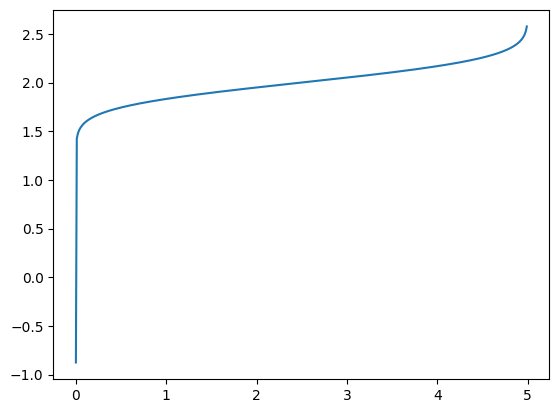

In [41]:
import matplotlib.pyplot as plt
plt.plot(S,M)